In [19]:
%matplotlib inline

# Task 2
### Dimensionality Reduction with Neighborhood Components Analysis

In this task we apply PCA to reduce the dimension of features to transform the data from a high-dimension space into a low-dimension space so that the low-dimension representation retains some meaningful properties of the original data. 

We made use of the Sklearn library to test and train our dataset

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

*Loading the test and train datasets*

In [21]:
# df_train=pd.read_csv('csv/train_tfidf_features.csv')
# df_test=pd.read_csv('csv/test_tfidf_features.csv')
df_train=pd.read_csv('/Users/keshavnatarajan/Downloads/50007-2022/train_tfidf_features.csv')
df_test=pd.read_csv('/Users/keshavnatarajan/Downloads/50007-2022/test_tfidf_features.csv')

*Preparing the data by dropping unnecessary labels*

In [22]:
print(df_train.shape)
print(df_test.shape)

df_train_dropped=df_train.drop(['id','label'], axis=1)
df_y=df_train['label']
df_test_dropped = df_test.drop(['id'], axis=1)
df_X=pd.concat([df_train_dropped,df_test_dropped])
print(df_X.shape)
print(df_train_dropped.shape)
print(df_test_dropped.shape)

X=df_X.to_numpy()
y=df_y.to_numpy()

(17184, 5002)
(4296, 5001)
(21480, 5000)
(17184, 5000)
(4296, 5000)


## Dimension Reduction  
Using PCA in the Sklearn library we reduce the dimensions from 5000 to our desired number of components: 2000, 1000, 500, or 100.

X_embedded is then generated using ...

The data is then split into training and testing components

In [32]:
pca = PCA(n_components=500)
X_embedded = pca.fit_transform(X)
print(X_embedded.shape)
pd.DataFrame(X_embedded)

X_embedded_train = X_embedded[:17184]
X_embedded_test = X_embedded[17184:]

(21480, 500)


## KNN Machine Learning Model

1. Initialising K to 2 neighbors.
2. Splitting the dataset to the training and testing dataset
3. Fitting the datapoints to the nearest classifier to train the model
4. Computing the accuracy of the test results
5. Plotting the results to be displayed

We observed the results based on the number of components as such:

- 100 components - 64%
- 500 components - 64%
- 1000 components - 60%
- 2000 components - 51%

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


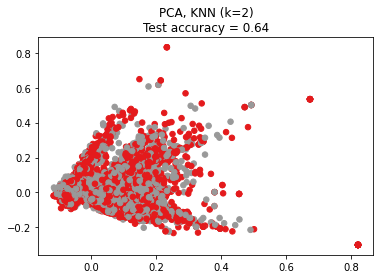

In [33]:
# defining constants
n_neighbors = 2
random_state = 0

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# plt.figure()
plt.figure()
# plt.subplot(1, 3, i + 1, aspect=1)

X_train, X_test, y_train, y_test = train_test_split(
    X_embedded_train, y, test_size=0.5, stratify=y, random_state=random_state
)

# Fit a nearest neighbor classifier on the embedded training set
knn.fit(X_train, y_train)

# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = knn.score(X_test, y_test)

# Plot the projected points and show the evaluation score
plt.scatter(X_embedded_train[:, 0], X_embedded_train[:, 1], c=y, s=30, cmap="Set1")
plt.title(
    "{}, KNN (k={})\nTest accuracy = {:.2f}".format('PCA', n_neighbors, acc_knn)
)
plt.show()

In [34]:
knn1 = KNeighborsClassifier(n_neighbors=n_neighbors)
knn1.fit(X_embedded_train, y)
output=knn1.predict(X_embedded_test)
output = pd.DataFrame(output).set_index(df_test["id"])

output
output.to_csv("outputPCA.csv")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
